In [3]:
import os
import torch
from fastai.callbacks import *
# from enum import Enum
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ROOT_PATH = '/home/yasaisen/Desktop/09_research/09_research_main/lab_07'

In [5]:
temp = torch.load(os.path.join(ROOT_PATH, 'M6.0.1.pt'))
model = temp['model']
model.load_state_dict(temp['state_dict'])

<All keys matched successfully>

In [6]:
t = torch.randn((1, 3, 540, 540))
print(type(t))
print(t.shape)
get = model(t)
print(get.shape)

<class 'torch.Tensor'>
torch.Size([1, 3, 540, 540])
torch.Size([1, 4, 540, 540])


In [7]:
img_DIR = os.path.join(ROOT_PATH, 'M_v_6.0.0/model/dataset_C_v_3.0.1/test_imgs_rgb/TEST_TEST_G1_Lid3_LRid695_Gid1031_Bnrgb.png')

In [9]:
print(type(open_image(img_DIR)))

NameError: name 'open_image' is not defined

In [8]:
# def mask_cutter_v_2(img_DIR):
def test(get):
  img_DIR = os.path.join(ROOT_PATH, 'M_v_6.0.0/model/dataset_C_v_3.0.1/test_imgs/TEST_TEST_G1_Lid1_LRid687_Gid1029_Bn00.png')
  img = cv2.imread(img_DIR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # img = (img - np.min(img))/((np.max(img) - np.min(img)))
  # print(img)

  pred_idx = model(torch.from_numpy(img.transpose(2, 0, 1)/get).unsqueeze(0).to(torch.float32)).squeeze(0).detach().numpy().transpose(1, 2, 0)
  # print(type(pred_idx), pred_idx.shape)

  # print(np.min(pred_idx))

  # print(pred_idx)

  temp = pred_idx.transpose(2, 0, 1)[0]
  temp = np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp))))

  for i in range(0, pred_idx.shape[0]):
    for j in range(0, pred_idx.shape[1]):
      if temp[i][j] >= 0.5:
        img[i][j][0] = 255
        img[i][j][1] = 255
        img[i][j][2] = 255

  fig, ax = plt.subplots(1, 5, figsize=(16,8))

  ax[0].imshow(img)
  ax[0].set_title(get)

  temp = pred_idx.transpose(2, 0, 1)[0]
  ax[1].imshow(np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp)))))
  ax[1].set_title("0")

  temp = pred_idx.transpose(2, 0, 1)[1]
  ax[2].imshow(np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp)))))
  ax[2].set_title("1")

  temp = pred_idx.transpose(2, 0, 1)[2]
  ax[3].imshow(np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp)))))
  ax[3].set_title("2")

  temp = pred_idx.transpose(2, 0, 1)[3]
  ax[4].imshow(np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp)))))
  ax[4].set_title("3")
  plt.show()

# original = cv2.imread(img_DIR).transpose(2, 0, 1)

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# max = 0
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# # print(cnts)
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     if h > max : 
#       max = h
#       max_index = c

# new_img = resize(original, (540, 540))
# try:
#   x,y,w,h = cv2.boundingRect(max_index)
# except UnboundLocalError:
#   print('Jumping over ' + img_DIR)
#   return original

# x,y,w,h = fixfix(x,y,w,h)

# # cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
# new_img = resize(original[y:y+h, x:x+w], (540, 540))

# new_img = new_img*255

# # plt.figure()
# # plt.imshow(new_img)
# # plt.show()

# # print(img_DIR.split('/')[-1], np.unique(new_img), x, y, w, h)

# return new_img

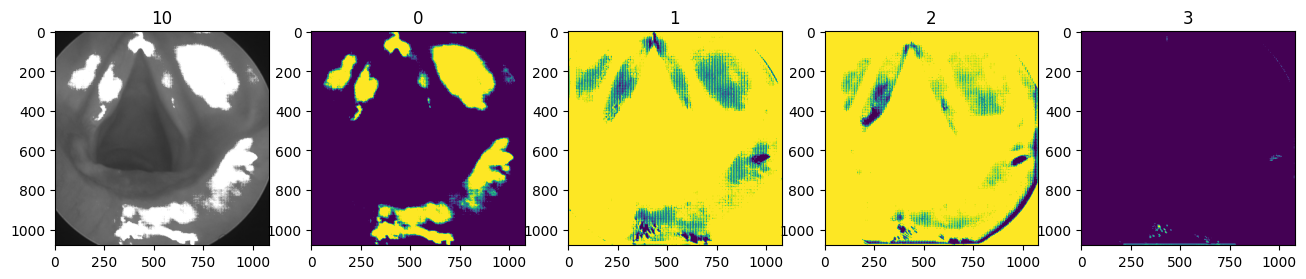

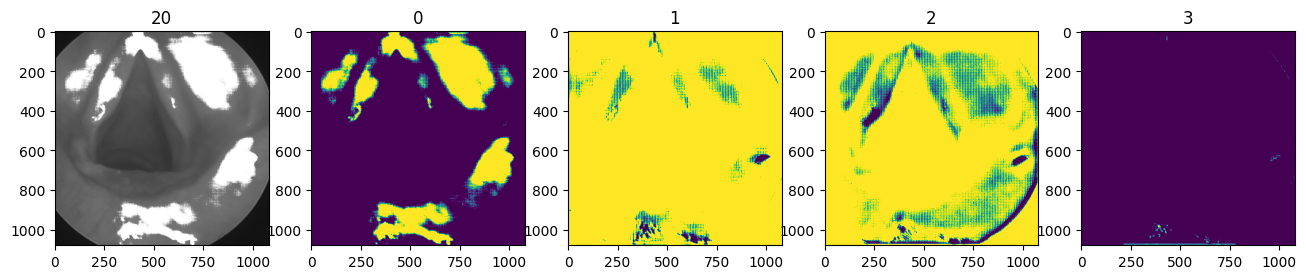

KeyboardInterrupt: 

In [10]:
for i in range(1, 256):
    if i%10==0:
        test(i)

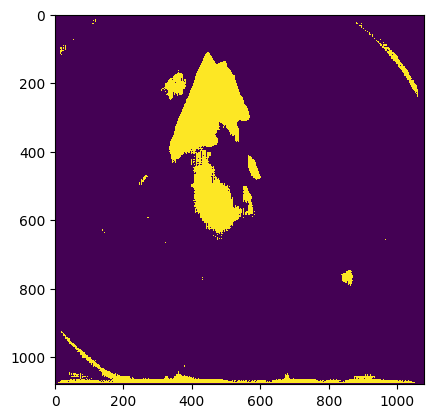

In [89]:
temp = pred_idx.transpose(2, 0, 1)[1]

round = np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp))))

plt.imshow(round, interpolation='nearest')
plt.show()

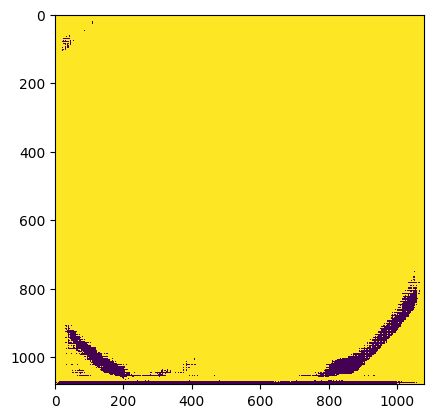

In [90]:
temp = pred_idx.transpose(2, 0, 1)[2]

round = np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp))))

plt.imshow(round, interpolation='nearest')
plt.show()

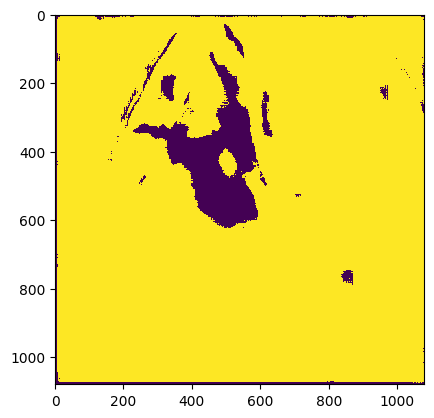

In [91]:
temp = pred_idx.transpose(2, 0, 1)[3]

round = np.round((temp - np.min(temp))/((np.max(temp) - np.min(temp))))

plt.imshow(round, interpolation='nearest')
plt.show()

# Libraries

In [13]:
!nvidia-smi

Fri Apr 28 17:03:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 33%   34C    P8    17W / 160W |    380MiB /  6144MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
# from google.colab import drive

# drive.mount('/content/drive')
ROOT_PATH = 'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model'

In [15]:
!pip install fastai==1.0.58
!pip install torch==1.4.0
!pip install torchvision==0.5.0

ERROR: Could not find a version that satisfies the requirement torch==1.4.0 (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0)
ERROR: No matching distribution found for torch==1.4.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.5.0 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.11.1, 0.11.2, 0.11.3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1)
ERROR: No matching distribution found for torchvision==0.5.0


In [16]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Importing the FastAI libraries:

In [17]:
!pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [18]:
# from collections.abc import Iterable

In [72]:
from fastai.vision import *
from fastai.metrics import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [73]:

from datetime import datetime
from time import time

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# import warnings

import fastai
# from fastai.vision import *
from fastai.callbacks import *
# from fastai.callbacks.hooks import *
# from fastai.utils.mem import *

In [74]:
from fastai.utils.show_install import show_install; show_install()



```text
=== Software === 
python       : 3.8.16
fastai       : 1.0.58
fastprogress : 1.0.3
torch        : 1.13.1+cu116
torch cuda   : 11.6 / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Linux-5.19.0-35-generic-x86_64-with-glibc2.35
distro       : Ubuntu 22.04 Jammy Jellyfish
conda env    : Unknown
python       : /bin/python3.8
sys.path     : /home/yasaisen/Desktop/09_research/09_research_main/lab_07
/usr/lib/python38.zip
/usr/lib/python3.8
/usr/lib/python3.8/lib-dynload

/home/yasaisen/.local/lib/python3.8/site-packages
/usr/local/lib/python3.8/dist-packages
/usr/lib/python3/dist-packages
no supported gpus found on this system
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.



/home/yasaisen/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Dataset

In [22]:
def checkpath(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [23]:
# model

mVersion = 'M6.0.0'

root_folder = os.path.abspath(os.path.join(ROOT_PATH, mVersion))

model_DIR = os.path.abspath(os.path.join(root_folder, 'model'))
checkpath(model_DIR)

In [24]:
root_folder

'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model\\M6.0.0'

In [25]:
# dataset

# dVersion = 'C2.9.3'

root_folder = os.path.abspath(os.path.join(ROOT_PATH, 'forstartdata'))

classescsv_path = os.path.join(root_folder, 'classes.csv')
# classescsv_path = os.path.join(root_folder, 'classes_all_classes.csv')

In [26]:
size = 540
bs = 2

The classes are stored in a csv so taking a look at it:

In [27]:
classescsv = pd.read_csv(classescsv_path)

classescsv.head()

,_id,_class,_name
0,0,ground,ground
1,1,frontglottis,frontglottis
2,2,vfright,vfright
3,3,vfleft,vfleft


I will now seperate out the _class since it contains the classes and turn it into a list:

In [28]:
classes = list(classescsv['_class'])
classes

['ground', 'frontglottis', 'vfright', 'vfleft']

Finally defining the data our model will run on:

In [29]:
trainpath = os.path.join(root_folder, 'train_for_base_imgs\\')
# trainpath_rgb = os.path.join(root_folder, 'train_for_base_imgs_rgb/')
trainlabel = os.path.join(root_folder, 'train_for_base_mask\\')

# trainpath_ = os.path.join(root_folder, 'train_for_step_imgs/')
# trainpath_rgb_ = os.path.join(root_folder, 'train_for_step_imgs_rgb/')
# trainlabel_ = os.path.join(root_folder, 'train_for_step_mask/')

validpath = os.path.join(root_folder, 'valid_imgs\\')
# validpath_rgb = os.path.join(root_folder, 'valid_imgs_rgb/')
validlabel = os.path.join(root_folder, 'valid_mask\\')

# testpath = os.path.join(root_folder, 'test_imgs/')
# testpath_rgb = os.path.join(root_folder, 'test_imgs_rgb/')
# testlabel = os.path.join(root_folder, 'test_mask/')

In [30]:
def transform(self, tfms:Optional[Tuple[TfmList,TfmList]]=(None,None), **kwargs):
    if not tfms: tfms=(None,None)
    assert is_listy(tfms) and len(tfms) == 2
    self.train.transform(tfms[0], **kwargs)
    self.valid.transform(tfms[1], **kwargs)
    kwargs['tfm_y'] = False # Test data has no labels
    if self.test: self.test.transform(tfms[1], **kwargs)
    return self

fastai.data_block.ItemLists.transform = transform

In [31]:
def get_mask(imgs_name):
  if str(imgs_name).split('\\')[-2] == 'train_for_base_imgs' :
    return trainlabel
  else:
    return validlabel

In [32]:
get_z = lambda x: get_mask(x) + (x.stem.replace(x.stem.split('_B')[-1], 'RRR')).replace('BRRR', 'C4.png')
# # get_z = lambda x: get_mask(x) + (x.stem.replace(x.stem.split('_B')[-1], 'RRR')).replace('BRRR', 'C12.png')

In [33]:
# NEW_DATA_PATH = os.path.join(ROOT_PATH, 'data')

# new_train_for_base_mask_DIR = os.path.join(NEW_DATA_PATH, 'train_for_base_mask')
# new_train_for_base_jpgs_DIR = os.path.join(NEW_DATA_PATH, 'train_for_base_imgs')
# new_train_for_base_jpgs_rgb_DIR = os.path.join(NEW_DATA_PATH, 'train_for_base_imgs_rgb')

# new_train_for_step_mask_DIR = os.path.join(NEW_DATA_PATH, 'train_for_step_mask')
# new_train_for_step_jpgs_DIR = os.path.join(NEW_DATA_PATH, 'train_for_step_imgs')
# new_train_for_step_jpgs_rgb_DIR = os.path.join(NEW_DATA_PATH, 'train_for_step_imgs_rgb')

# new_valid_mask_DIR = os.path.join(NEW_DATA_PATH, 'valid_mask')
# new_valid_jpgs_DIR = os.path.join(NEW_DATA_PATH, 'valid_imgs')
# new_valid_jpgs_rgb_DIR = os.path.join(NEW_DATA_PATH, 'valid_imgs_rgb')

# new_test_mask_DIR = os.path.join(NEW_DATA_PATH, 'test_mask')
# new_test_jpgs_DIR = os.path.join(NEW_DATA_PATH, 'test_imgs')
# new_test_jpgs_rgb_DIR = os.path.join(NEW_DATA_PATH, 'test_imgs_rgb')

# checkpath(new_train_for_base_mask_DIR)
# checkpath(new_train_for_base_jpgs_DIR)
# checkpath(new_train_for_base_jpgs_rgb_DIR)

# checkpath(new_train_for_step_mask_DIR)  
# checkpath(new_train_for_step_jpgs_DIR)
# checkpath(new_train_for_step_jpgs_rgb_DIR)

# checkpath(new_valid_mask_DIR)
# checkpath(new_valid_jpgs_DIR)
# checkpath(new_valid_jpgs_rgb_DIR)

# checkpath(new_test_mask_DIR)
# checkpath(new_test_jpgs_DIR)
# checkpath(new_test_jpgs_rgb_DIR)

In [34]:
data = (SegmentationItemList.from_folder(root_folder)
        .split_by_folder(train='train_for_base_imgs', valid='valid_imgs')
        # .split_by_rand_pct(.2)
        .label_from_func(get_z, classes=classes)
        # .transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        # .normalize(imagenet_stats)
       )

In [35]:
# data

Taking a look at an image with its mask:

In [36]:
# data.show_batch(2, figsize=(6,6))

Defining and downloading the UNet:

# Model

In [37]:
def cust_accuracy(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Computes accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=1).view(n,-1)
    targs = targs.view(n,-1)
    return (input==targs).float().mean()

In [38]:
# Return Jaccard index, or Intersection over Union (IoU) value
def IoU(preds:Tensor, targs:Tensor, eps:float=1e-8):
    """Computes the Jaccard loss, a.k.a the IoU loss.
    Notes: [Batch size,Num classes,Height,Width]
    Args:
        targs: a tensor of shape [B, H, W] or [B, 1, H, W].
        preds: a tensor of shape [B, C, H, W]. Corresponds to
            the raw output or logits of the model. (prediction)
        eps: added to the denominator for numerical stability.
    Returns:
        iou: the average class intersection over union value 
             for multi-class image segmentation
    """
    num_classes = preds.shape[1]
    
    # Single class segmentation?
    if num_classes == 1:
        true_1_hot = torch.eye(num_classes + 1)[targs.squeeze(1)]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        true_1_hot_f = true_1_hot[:, 0:1, :, :]
        true_1_hot_s = true_1_hot[:, 1:2, :, :]
        true_1_hot = torch.cat([true_1_hot_s, true_1_hot_f], dim=1)
        pos_prob = torch.sigmoid(preds)
        neg_prob = 1 - pos_prob
        probas = torch.cat([pos_prob, neg_prob], dim=1)
        
    # Multi-class segmentation
    else:
        # Convert target to one-hot encoding
        # true_1_hot = torch.eye(num_classes)[torch.squeeze(targs,1)]
        true_1_hot = torch.eye(num_classes)[targs.squeeze(1)]
        
        # Permute [B,H,W,C] to [B,C,H,W]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        
        # Take softmax along class dimension; all class probs add to 1 (per pixel)
        probas = F.softmax(preds, dim=1)
        
    true_1_hot = true_1_hot.type(preds.type())
    
    # Sum probabilities by class and across batch images
    dims = (0,) + tuple(range(2, targs.ndimension()))
    intersection = torch.sum(probas * true_1_hot, dims) # [class0,class1,class2,...]
    cardinality = torch.sum(probas + true_1_hot, dims)  # [class0,class1,class2,...]
    union = cardinality - intersection
    iou = (intersection / (union + eps)).mean()   # find mean of class IoU values
    return iou

In [39]:
def dice(input:Tensor, targs:Tensor, eps:float=1e-8)->Rank0Tensor:
    input = input.clone()
    targs = targs.clone()
    n = targs.shape[0]
    input = torch.softmax(input, dim=1).argmax(dim=1)
    input = input.view(n, -1)
    targs = targs.view(n, -1)
    input[input == 0] = -999
    intersect = (input == targs).sum().float()
    union = input[input > 0].sum().float() + targs[targs > 0].sum().float()
    del input, targs
    gc.collect()
    return ((2.0 * intersect + eps) / (union + eps)).mean()

In [40]:
def fmt_now():
    return datetime.today().strftime('%Y%m%d-%H%M%S')

In [41]:
class FocalLoss(nn.Module):
    def __init__(self, gamma):
        super().__init__()
        self.gamma = gamma
        
    def forward(self, input, target):
        if not (target.size() == input.size()):
            raise ValueError("Target size ({}) must be the same as input size ({})"
                             .format(target.size(), input.size()))

        max_val = (-input).clamp(min=0)
        loss = input - input * target + max_val + \
            ((-max_val).exp() + (-input - max_val).exp()).log()

        invprobs = F.logsigmoid(-input * (target * 2.0 - 1.0))
        loss = (invprobs * self.gamma).exp() * loss
        
        return loss.mean()

In [42]:
from torch import nn
import torch.nn.functional as F

class FocalLoss_C(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduction='elementwise_mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduction = reduction

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction is None:
            return F_loss
        else:
            return torch.mean(F_loss)

In [43]:
class MixedLoss(nn.Module):
    def __init__(self, alpha, gamma):
        super().__init__()
        self.alpha = alpha
        self.focal = FocalLoss(gamma)
        
    def forward(self, input, target):
        loss = self.alpha*self.focal(input, target) - torch.log(dice_loss(input, target))
        return loss.mean()

In [44]:
metrics = [dice, IoU]

callback_fns = [
    ShowGraph,
    # partial(SaveModelCallback, every='epoch', name=f"{fmt_now()}_unet_resnet34"),   
    # stop training if metric no longer improve
    # partial(EarlyStoppingCallback, monitor='IoU', min_delta=0.01, patience=2),
]

learner = unet_learner(data, models.resnet34, metrics=metrics, wd=1e-2, callback_fns=callback_fns)
learner.model_dir = model_DIR

In [45]:
model_DIR

'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model\\M6.0.0\\model'

In [46]:
# model.pth

In [47]:
# learner = load_learner(model_DIR)

In [48]:
# learner = unet_learner().load(model_DIR)

In [49]:
# learner.loss_func = FocalLoss_C()

In [50]:
learner.loss_func

FlattenedLoss of CrossEntropyLoss()

In [51]:
# print(learner)

In [52]:
# learner.load(model_DIR)

In [53]:
model_DIR

'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model\\M6.0.0\\model'

In [54]:
model_DIR.replace('\\M6.0.0\\model', '.pth')

'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model.pth'

In [55]:
learner.load('C:\\Users\\user\\Desktop\\M_v_6.0.0\\model')

Learner(data=ImageDataBunch;

Train: LabelList (9 items)
x: SegmentationItemList
Image (3, 1080, 1080),Image (3, 1080, 1080),Image (3, 1080, 1080),Image (3, 1080, 1080),Image (3, 1080, 1080)
y: SegmentationLabelList
ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080)
Path: C:\Users\user\Desktop\M_v_6.0.0\model\forstartdata;

Valid: LabelList (3 items)
x: SegmentationItemList
Image (3, 1080, 1080),Image (3, 1080, 1080),Image (3, 1080, 1080)
y: SegmentationLabelList
ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080),ImageSegment (1, 1080, 1080)
Path: C:\Users\user\Desktop\M_v_6.0.0\model\forstartdata;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (

In [56]:
torch.save({'state_dict': learner.model.state_dict(), 'model': learner.model,}, 'C:\\Users\\user\\Desktop\\M6.0.0.pt')

In [45]:
# learner.summary()

# Train

Training the data:

In [46]:
# learner.lr_find()
# learner.recorder.plot(skip_end=10, suggestion=True)

In [47]:
# learner.fit_one_cycle(40, max_lr=slice(1e-3, 1e-5))

In [48]:
# learner.recorder.plot_losses()
# learner.recorder.plot_metrics()

Since the both the losses seem small enough, lets predict:

In [49]:
# learner.save(model_DIR)

# Predictions

In [50]:
# learner.show_results(figsize=(15,15))

On the left is the actual images while on the left is the predictions! They look almost identical and thereby here I conclude this notebook.

If you liked this notebook, an upvote would be of tremendous help as I trot forward with my infatuation with Deep Learning :)

# Evaluation

In [51]:
# trainpath = os.path.join(root_folder, 'train_for_base_imgs/')
# trainpath_rgb = os.path.join(root_folder, 'train_for_base_imgs_rgb/')
# trainlabel = os.path.join(root_folder, 'train_for_base_mask/')

# trainpath_ = os.path.join(root_folder, 'train_for_step_imgs/')
# trainpath_rgb_ = os.path.join(root_folder, 'train_for_step_imgs_rgb/')
# trainlabel_ = os.path.join(root_folder, 'train_for_step_mask/')

# validpath = os.path.join(root_folder, 'valid_imgs/')
# validpath_rgb = os.path.join(root_folder, 'valid_imgs_rgb/')
# validlabel = os.path.join(root_folder, 'valid_mask/')

# testpath = os.path.join(root_folder, 'test_imgs/')
# testpath_rgb = os.path.join(root_folder, 'test_imgs_rgb/')
# testlabel = os.path.join(root_folder, 'test_mask/')

In [52]:
# !pip install opencv-python

In [53]:
import cv2
import seaborn as sn
from numpy.lib.function_base import average
from skimage.transform import resize

In [54]:
# def confusion_matrix(now_imgs_DIR, now_mask_DIR, confusion_matrix):

#   _SIZE = 540

#   # confusion_matrix = np.zeros((12,12))

#   img = open_image(now_imgs_DIR)
#   mask = cv2.imread(now_mask_DIR)
#   # print(now_imgs_DIR.replace('/content/drive/My Drive/09_research_main/lab_01/data/dataset_C_v_2.6.1', ''))

#   # img.show(figsize=(6,6))
#   # plt.show()
#   # plt.imshow(mask*40)
#   # plt.show()

#   mask = cv2.resize(mask, (_SIZE,_SIZE))
#   mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

#   pred, pred_idx, probs = learner.predict(img)

#   # plt.imshow((pred_idx.numpy()*40).reshape((_SIZE,_SIZE)))
#   # plt.show()

#   prediction = pred_idx.numpy()
#   prediction = prediction.reshape((_SIZE,_SIZE))

#   for i in range(0, mask.shape[0]):#-
#     for j in range(0, mask.shape[1]):#|
#       # print(prediction[i][j].item(),mask[i][j].item())
#       confusion_matrix[prediction[i][j].item()][mask[i][j].item()] += 1

#   # print(confusion_matrix)
#   return confusion_matrix

In [55]:
# def get_confusion_matrix(imgs_dir, label_dir, CLASSES):
#   LEN = len(CLASSES)
#   cm = np.zeros((LEN,LEN))

#   for get_to_name_path in os.listdir(imgs_dir):
#     now_imgs_DIR = os.path.join(imgs_dir,  get_to_name_path)
#     now_mask_DIR = os.path.join(label_dir, (get_to_name_path.replace(get_to_name_path.split('_')[-1], 'RRR')).replace('_RRR', '.png'))

#     cm = confusion_matrix(now_imgs_DIR, now_mask_DIR, cm)
#   return cm

In [56]:
# def print_cm(GET_CM, CLASSES):

#   df_cm = pd.DataFrame(GET_CM, index = [i for i in CLASSES], columns = [i for i in CLASSES])
#   plt.figure(figsize = (15,12))
#   sn.heatmap(df_cm, annot=True)

In [57]:
# def IoU_computer(a, CLASSES):
#   LEN = len(CLASSES)
#   IoUstr = []
#   IoU = []

#   for i in range(1, LEN):
#     temp = 0
#     for j in range(1, LEN):
#       temp += a[j][i] + a[i][j]
#     IoUstr += [str(a[i][i])+'/'+str(temp-a[i][i])]
#     IoU += [a[i][i]/(temp-a[i][i])]

#   ALL_IoU = average(IoU)

#   print(IoUstr)
#   print(IoU)
#   print(f'IoU = {ALL_IoU:.2f}')

In [58]:
# def evaluation(imgs_dir, label_dir, classes):
#   cm = get_confusion_matrix(imgs_dir, label_dir, classes)

#   acm = cm
#   acm[0][0] = 50

#   print_cm(cm, classes)
#   IoU_computer(cm, classes)

In [59]:
# maim step test for acc & cm

# evaluation(trainpath_, trainlabel_, classes)

In [60]:
# maim valid test for acc & cm

# evaluation(validpath, validlabel, classes)

In [61]:
# maim test test for acc & cm

# evaluation(testpath, testlabel, classes)

#Export step dataset

In [62]:
ROOT_PATH

'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model'

In [63]:
# # Export dataset version

Version = 'data/dataset_for_step_' + mVersion + '_' + '_D2.0.0'

bindingset_dir = os.path.abspath(os.path.join(ROOT_PATH, Version))

# step_train_bindingset_dir =             os.path.join(bindingset_dir, 'step_train/step_train')
# step_train_focused_bindingset_dir =     os.path.join(bindingset_dir, 'step_train/step_train_focused')
# step_train_rgb_bindingset_dir =         os.path.join(bindingset_dir, 'step_train/step_train_rgb')
# step_train_rgb_focused_bindingset_dir = os.path.join(bindingset_dir, 'step_train/step_train_rgb_focused')
# step_train_pred_idx_bindingset_dir =    os.path.join(bindingset_dir, 'step_train/step_train_pred_idx')
# step_train_tensor_bindingset_dir =      os.path.join(bindingset_dir, 'step_train/step_train_tensor')

# step_valid_bindingset_dir =             os.path.join(bindingset_dir, 'step_valid/step_valid')
# step_valid_focused_bindingset_dir =     os.path.join(bindingset_dir, 'step_valid/step_valid_focused')
# step_valid_rgb_bindingset_dir =         os.path.join(bindingset_dir, 'step_valid/step_valid_rgb')
# step_valid_rgb_focused_bindingset_dir = os.path.join(bindingset_dir, 'step_valid/step_valid_rgb_focused')
# step_valid_pred_idx_bindingset_dir =    os.path.join(bindingset_dir, 'step_valid/step_valid_pred_idx')
# step_valid_tensor_bindingset_dir =      os.path.join(bindingset_dir, 'step_valid/step_valid_tensor')

# valid_bindingset_dir =                  os.path.join(bindingset_dir, 'valid/valid')
# valid_focused_bindingset_dir =          os.path.join(bindingset_dir, 'valid/valid_focused')
# valid_rgb_bindingset_dir =              os.path.join(bindingset_dir, 'valid/valid_rgb')
# valid_rgb_focused_bindingset_dir =      os.path.join(bindingset_dir, 'valid/valid_rgb_focused')
# valid_pred_idx_bindingset_dir =         os.path.join(bindingset_dir, 'valid/valid_pred_idx')
# valid_tensor_bindingset_dir =           os.path.join(bindingset_dir, 'valid/valid_tensor')

# test_bindingset_dir =                   os.path.join(bindingset_dir, 'test/test')
# test_focused_bindingset_dir =           os.path.join(bindingset_dir, 'test/test_focused')
# test_rgb_bindingset_dir =               os.path.join(bindingset_dir, 'test/test_rgb')
test_rgb_focused_bindingset_dir =       os.path.join(bindingset_dir, 'test\\test_rgb_focused')
# test_pred_idx_bindingset_dir =          os.path.join(bindingset_dir, 'test/test_pred_idx')
# test_tensor_bindingset_dir =            os.path.join(bindingset_dir, 'test/test_tensor')


# checkpath(step_train_bindingset_dir)
# checkpath(step_train_focused_bindingset_dir)
# checkpath(step_train_rgb_bindingset_dir)
# checkpath(step_train_rgb_focused_bindingset_dir)
# checkpath(step_train_pred_idx_bindingset_dir)
# checkpath(step_train_tensor_bindingset_dir)

# checkpath(step_valid_bindingset_dir)
# checkpath(step_valid_focused_bindingset_dir)
# checkpath(step_valid_rgb_bindingset_dir)
# checkpath(step_valid_rgb_focused_bindingset_dir)
# checkpath(step_valid_pred_idx_bindingset_dir)
# checkpath(step_valid_tensor_bindingset_dir)

# checkpath(valid_bindingset_dir)
# checkpath(valid_focused_bindingset_dir)
# checkpath(valid_rgb_bindingset_dir)
# checkpath(valid_rgb_focused_bindingset_dir)
# checkpath(valid_pred_idx_bindingset_dir)
# checkpath(valid_tensor_bindingset_dir)

# checkpath(test_bindingset_dir)
# checkpath(test_focused_bindingset_dir)
# checkpath(test_rgb_bindingset_dir)
# checkpath(test_rgb_focused_bindingset_dir)
# checkpath(test_pred_idx_bindingset_dir)
# checkpath(test_tensor_bindingset_dir)

##Export non-tensor

In [64]:
def mask_cutter(img_DIR):
  img = cv2.imread(img_DIR)
  pred_idx = learner.predict(open_image(img_DIR))[1].numpy()

  mask_ = resize(pred_idx.reshape((540, 540)), (1080, 1080))
  # print(mask_[0][0])

  for i in range(0, mask_.shape[0]):
    for j in range(0, mask_.shape[1]):
      if mask_[i][j] <= 5.5e-20:#5.421010862427522e-20
        img[i][j][0] = 255
        img[i][j][1] = 255
        img[i][j][2] = 255

  # img = resize(img, (540, 540))
  # plt.figure()
  # plt.imshow(img)
  # plt.show()

  return img

In [65]:
def fixfix(x,y,w,h):
  if w >= h:
    y = int(y - (h / 4))
    if y < 0 : y = 0
    h = w
    if y + h > 1080 : y = 1080 - h
  else:
    x = int(x - (w / 4))
    if x < 0 : x = 0
    w = h
    if x + w > 1080 : x = 1080 - w
  return x,y,w,h

In [66]:
from matplotlib import pyplot as plt

In [67]:
def mask_cutter_v_2(img_DIR):
  img = cv2.imread(img_DIR)
  pred_idx = learner.predict(open_image(img_DIR))[1].numpy()

  # print(type(pred_idx), pred_idx.shape)

  # pred_idx = np.array(pred_idx)

  print(type(pred_idx), pred_idx.shape)

  # mask_ = resize(pred_idx.reshape((1080, 1080)), (1080, 1080))
  mask_ = pred_idx

  plt.imshow(pred_idx, interpolation='nearest')
  plt.show()

  # for i in range(0, mask_.shape[0]):
  #   for j in range(0, mask_.shape[1]):
  #     if mask_[i][j].all() <= 5.5e-20:
  #       img[i][j][0] = 255
  #       img[i][j][1] = 255
  #       img[i][j][2] = 255
  
  # original = img.copy()

  # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # max = 0
  # cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  # # print(cnts)
  # for c in cnts:
  #     x,y,w,h = cv2.boundingRect(c)
  #     if h > max : 
  #       max = h
  #       max_index = c

  # new_img = resize(original, (540, 540))
  # try:
  #   x,y,w,h = cv2.boundingRect(max_index)
  # except UnboundLocalError:
  #   print('Jumping over ' + img_DIR)
  #   return original

  # x,y,w,h = fixfix(x,y,w,h)

  # # cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
  # new_img = resize(original[y:y+h, x:x+w], (540, 540))

  # new_img = new_img*255

  # # plt.figure()
  # # plt.imshow(new_img)
  # # plt.show()

  # # print(img_DIR.split('/')[-1], np.unique(new_img), x, y, w, h)

  return new_img

In [68]:
# # run & save bindingset_v_2_trainmaker

# kokocounter = 0

# for imgs_name in os.listdir(trainpath_):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png', kokocounter)

#   if kokocounter%10 == 0:
#     cv2.imwrite(os.path.join(step_valid_bindingset_dir,             imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_,     imgs_name)))
#     cv2.imwrite(os.path.join(step_valid_focused_bindingset_dir,     imgs_name.split('.')[0] + '_' + mVersion + '_gs_CFid' +  str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_,     imgs_name)))
#     if imgs_name.split('_B')[1] == 'n00.png':
#       cv2.imwrite(os.path.join(step_valid_rgb_bindingset_dir,         imgs_name.split('.')[0] + '_' + mVersion + '_rgb_COid' + str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#       cv2.imwrite(os.path.join(step_valid_rgb_focused_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_rgb_CFid' + str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#       np.save(os.path.join(step_valid_pred_idx_bindingset_dir,        imgs_name.split('.')[0] + '_' + mVersion + '_pm_COid' +  str(kokocounter)), learner.predict(open_image(os.path.join(trainpath_, imgs_name)))[1].numpy().reshape((540, 540)))
#   else:
#     cv2.imwrite(os.path.join(step_train_bindingset_dir,             imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_,     imgs_name)))
#     cv2.imwrite(os.path.join(step_train_focused_bindingset_dir,     imgs_name.split('.')[0] + '_' + mVersion + '_gs_CFid' +  str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_,     imgs_name)))
#     if imgs_name.split('_B')[1] == 'n00.png':
#       cv2.imwrite(os.path.join(step_train_rgb_bindingset_dir,         imgs_name.split('.')[0] + '_' + mVersion + '_rgb_COid' + str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#       cv2.imwrite(os.path.join(step_train_rgb_focused_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_rgb_CFid' + str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#       np.save(os.path.join(step_train_pred_idx_bindingset_dir,        imgs_name.split('.')[0] + '_' + mVersion + '_pm_COid' +  str(kokocounter)), learner.predict(open_image(os.path.join(trainpath_, imgs_name)))[1].numpy().reshape((540, 540)))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [69]:
# # run & save bindingset_v_2_trainmaker

# kokocounter = 0

# for imgs_name in os.listdir(trainpath_):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png', kokocounter)

#   cv2.imwrite(os.path.join(step_train_bindingset_dir,             imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_,     imgs_name)))
#   cv2.imwrite(os.path.join(step_train_focused_bindingset_dir,     imgs_name.split('.')[0] + '_' + mVersion + '_gs_CFid' +  str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_,     imgs_name)))
#   if imgs_name.split('_B')[1] == 'n00.png':
#     cv2.imwrite(os.path.join(step_train_rgb_bindingset_dir,         imgs_name.split('.')[0] + '_' + mVersion + '_rgb_COid' + str(kokocounter) + '.png'), mask_cutter(    os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#     cv2.imwrite(os.path.join(step_train_rgb_focused_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_rgb_CFid' + str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(trainpath_rgb_, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#     np.save(os.path.join(step_train_pred_idx_bindingset_dir,        imgs_name.split('.')[0] + '_' + mVersion + '_pm_COid' +  str(kokocounter)), learner.predict(open_image(os.path.join(trainpath_, imgs_name)))[1].numpy().reshape((540, 540)))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [70]:
# # run & save bindingset_v_2_validmaker

# kokocounter = 0

# for imgs_name in os.listdir(validpath):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png', kokocounter)

#   cv2.imwrite(os.path.join(valid_bindingset_dir,             imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png'), mask_cutter(    os.path.join(validpath,     imgs_name)))
#   cv2.imwrite(os.path.join(valid_focused_bindingset_dir,     imgs_name.split('.')[0] + '_' + mVersion + '_gs_CFid' +  str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(validpath,     imgs_name)))
#   if imgs_name.split('_B')[1] == 'n00.png':
#     cv2.imwrite(os.path.join(valid_rgb_bindingset_dir,         imgs_name.split('.')[0] + '_' + mVersion + '_rgb_COid' + str(kokocounter) + '.png'), mask_cutter(    os.path.join(validpath_rgb, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#     cv2.imwrite(os.path.join(valid_rgb_focused_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_rgb_CFid' + str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(validpath_rgb, imgs_name.split('_B')[0] + '_Bnrgb.png')))
#     np.save(os.path.join(valid_pred_idx_bindingset_dir,        imgs_name.split('.')[0] + '_' + mVersion + '_pm_COid' +  str(kokocounter)), learner.predict(open_image(os.path.join(validpath, imgs_name)))[1].numpy().reshape((540, 540)))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [71]:
testpath = 'C:\\Users\\user\\Desktop\\M_v_6.0.0\\model\\dataset_C_v_3.0.1\\test_imgs_rgb'

In [72]:
# run & save bindingset_v_2_testmaker

kokocounter = 0

for imgs_name in os.listdir(testpath):
  # print(imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png', kokocounter)

  # cv2.imwrite(os.path.join(test_bindingset_dir,             imgs_name.split('.')[0] + '_' + mVersion + '_gs_COid' +  str(kokocounter) + '.png'), mask_cutter(    os.path.join(testpath,     imgs_name)))
  # cv2.imwrite(os.path.join(test_focused_bindingset_dir,     imgs_name.split('.')[0] + '_' + mVersion + '_gs_CFid' +  str(kokocounter) + '.png'), mask_cutter_v_2(os.path.join(testpath,     imgs_name)))
  # if imgs_name.split('_B')[1] == 'n00.png':
    # cv2.imwrite(os.path.join(test_rgb_bindingset_dir,         imgs_name.split('.')[0] + '_' + mVersion + '_rgb_COid' + str(kokocounter) + '.png'), mask_cutter(    os.path.join(testpath_rgb, imgs_name.split('_B')[0] + '_Bnrgb.png')))
  name = os.path.join(test_rgb_focused_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_rgb_CFid' + str(kokocounter) + '.png')
  print(name)
  cv2.imwrite(name, mask_cutter_v_2(os.path.join(testpath, imgs_name)))
    # np.save(os.path.join(test_pred_idx_bindingset_dir,        imgs_name.split('.')[0] + '_' + mVersion + '_pm_COid' +  str(kokocounter)), learner.predict(open_image(os.path.join(testpath, imgs_name)))[1].numpy().reshape((540, 540)))
  kokocounter += 1
  
print('\n\nSuccessfully Completed!!!\n\n')#797

C:\Users\user\Desktop\M_v_6.0.0\model\data\dataset_for_step_M6.0.0__D2.0.0\test\test_rgb_focused\TEST_TEST_G1_Lid0_LRid598_Gid1028_Bnrgb_M6.0.0_rgb_CFid0.png
<class 'numpy.ndarray'> (1, 1080, 1080)


: 

: 

In [ ]:
# END HERE np.load('my_array.npy')

##Export tensor

In [ ]:
# # run & save bindingset_v_3_trainmaker

# kokocounter = 0

# for imgs_name in os.listdir(trainpath_):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt', kokocounter)

#   if kokocounter%10 == 0:
#     torch.save(learner.predict(open_image(os.path.join(trainpath_, imgs_name)))[2], os.path.join(step_valid_tensor_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt'))
#   else:
#     torch.save(learner.predict(open_image(os.path.join(trainpath_, imgs_name)))[2], os.path.join(step_train_tensor_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt'))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [ ]:
# # run & save bindingset_v_3_validmaker

# kokocounter = 0

# for imgs_name in os.listdir(trainpath_):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt', kokocounter)

#   torch.save(learner.predict(open_image(os.path.join(validpath, imgs_name)))[2], os.path.join(valid_tensor_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt'))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [ ]:
# # run & save bindingset_v_3_testmaker

# kokocounter = 0

# for imgs_name in os.listdir(trainpath_):
#   print(imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt', kokocounter)

#   torch.save(learner.predict(open_image(os.path.join(testpath, imgs_name)))[2], os.path.join(test_tensor_bindingset_dir, imgs_name.split('.')[0] + '_' + mVersion + '_tensor_COid' +  str(kokocounter) + '.pt'))

#   kokocounter += 1
  
# print('\n\nSuccessfully Completed!!!\n\n')#797

In [ ]:
# END HERE